In [526]:
import numpy as np
import pandas as pd

In [527]:
data = pd.read_csv("Titanic_dataset.csv")

In [528]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
698,699,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S


## Data Preprocessing

1. Droping of the unrequired columns
2. Missing value imputation
3. Feature Creation

checking for null values



In [529]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [530]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [531]:
#since Cabin 687 missing values so we can drop that column and ["PassengerId","Cabin","Name"] are not required in analysis
data.drop(columns  = ["PassengerId","Cabin","Name","Ticket"],inplace = True)

In [532]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
119,0,3,female,2.0,4,2,31.2750,S
682,0,3,male,20.0,0,0,9.2250,S
609,1,1,female,40.0,0,0,153.4625,S
217,0,2,male,42.0,1,0,27.0000,S
497,0,3,male,NaN,0,0,15.1000,S


In [533]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

## Feature creature

Since both SibSp and Parch represent the family_member only thus I created a new_feature named family_member

In [534]:


data["family_member"] = data["SibSp"] + data["Parch"]
data.drop(columns = ["SibSp","Parch"],inplace = True)

In [586]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_member
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


## EDA
1. Analysing numerical categories using kde(univariate and multivariate)
2. Analysing categorical categories 

1.Analysing numerical categories

(i) Performing univariate analysis


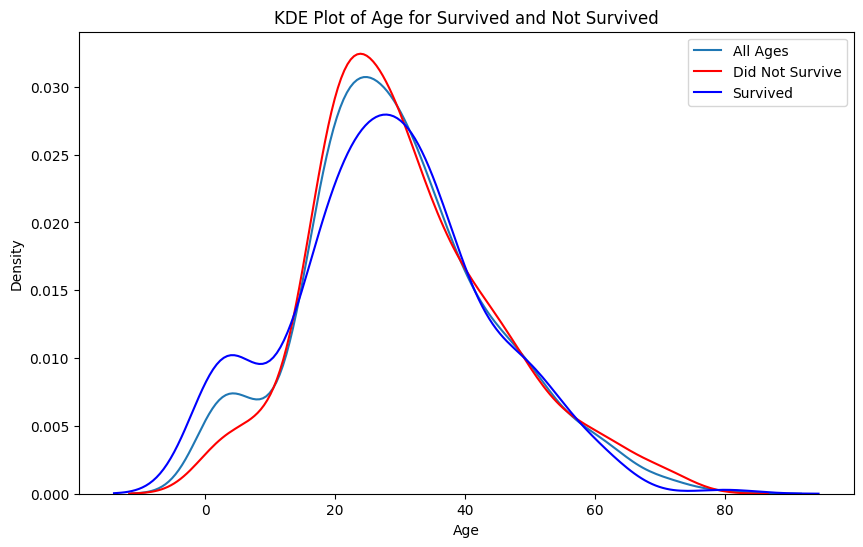

In [535]:
plt.figure(figsize=(10, 6))

# KDE plot for all ages
sns.kdeplot(data['Age'], label='All Ages')

# KDE plot for ages where Survived is 0
sns.kdeplot(data[data['Survived'] == 0]['Age'], color='red', label='Did Not Survive')

# KDE plot for ages where Survived is 1
sns.kdeplot(data[data['Survived'] == 1]['Age'], color='blue', label='Survived')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age for Survived and Not Survived')
plt.legend()

Conclusion :-
From this we get a bit idea that the peak of age for survived is less than the non-survived ones which shows that young people died more.

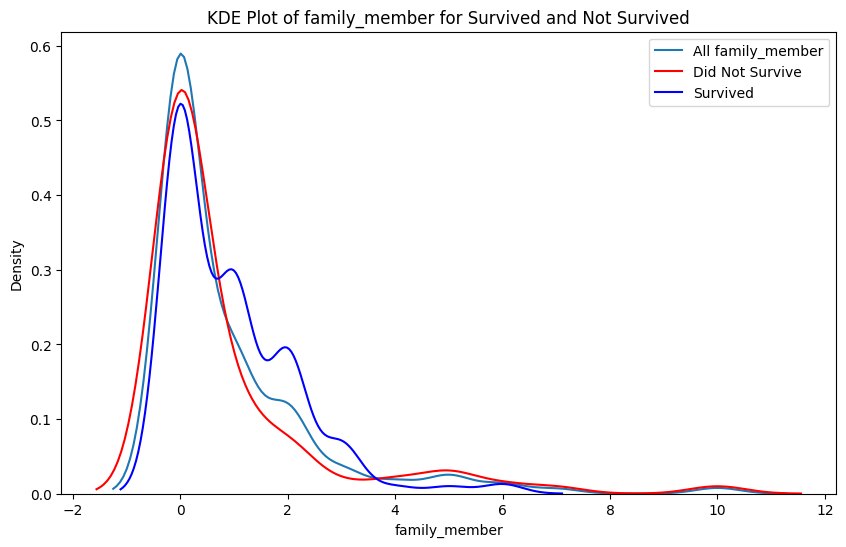

In [536]:
plt.figure(figsize=(10, 6))


sns.kdeplot(data['family_member'], label='All family_member')


sns.kdeplot(data[data['Survived'] == 0]['family_member'], color='red', label='Did Not Survive')


sns.kdeplot(data[data['Survived'] == 1]['family_member'], color='blue', label='Survived')

plt.xlabel('family_member')
plt.ylabel('Density')
plt.title('KDE Plot of family_member for Survived and Not Survived')
plt.legend()

Nothing to Conclude

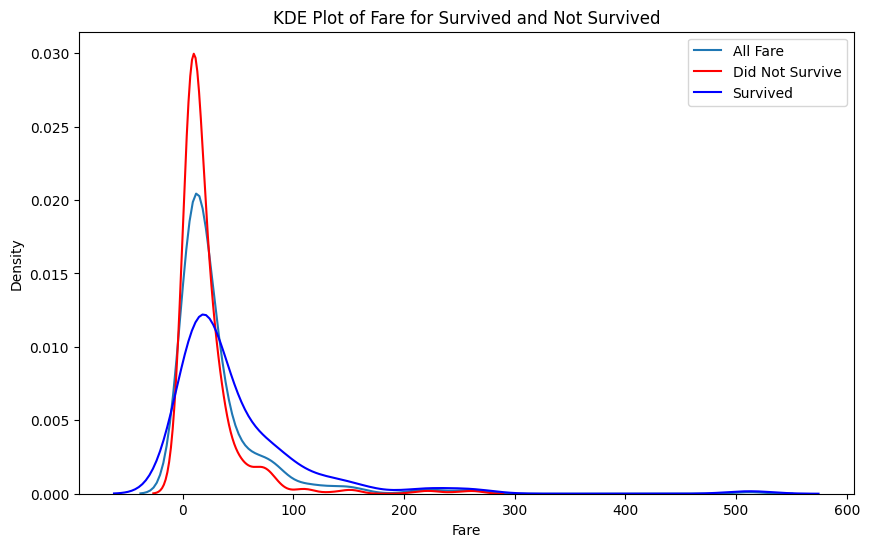

In [537]:
plt.figure(figsize=(10, 6))


sns.kdeplot(data['Fare'], label='All Fare')


sns.kdeplot(data[data['Survived'] == 0]['Fare'], color='red', label='Did Not Survive')


sns.kdeplot(data[data['Survived'] == 1]['Fare'], color='blue', label='Survived')

plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE Plot of Fare for Survived and Not Survived')
plt.legend()

Those who travelled at low fare died more


(ii) Bivariate Analysis


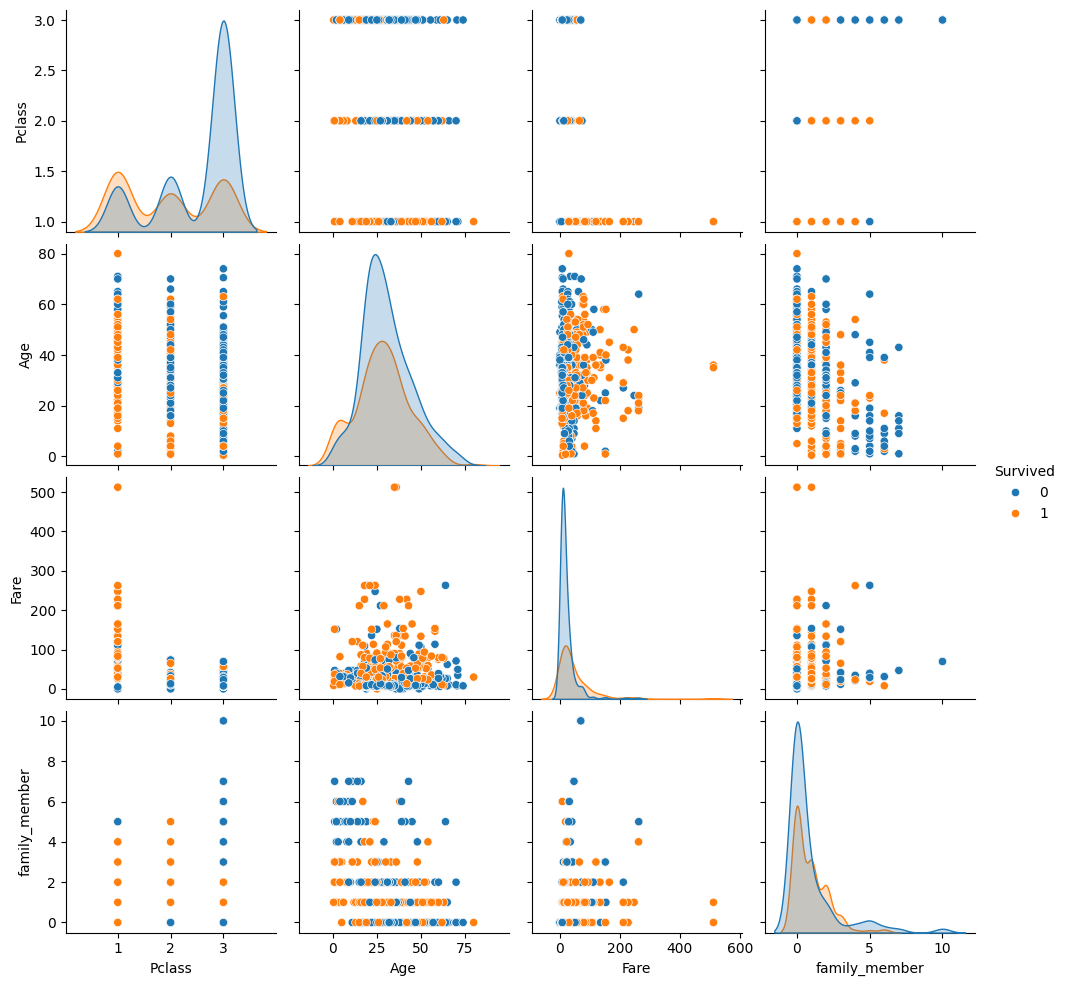

In [538]:
sns.pairplot(data,hue = "Survived")

2. EDA for Categorical Data 


(i) For Sex

<Axes: xlabel='Sex', ylabel='Count'>

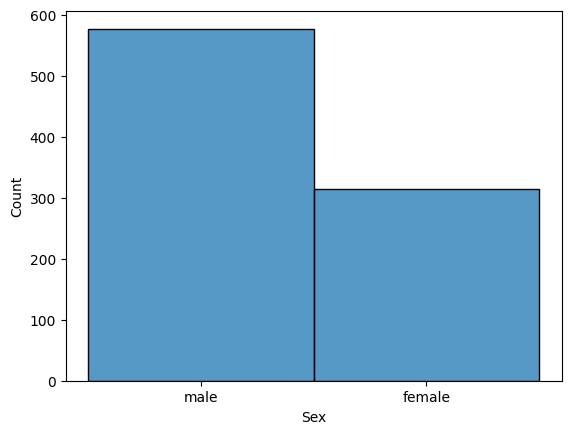

In [539]:

sns.histplot(data["Sex"])

<Axes: xlabel='Sex', ylabel='Count'>

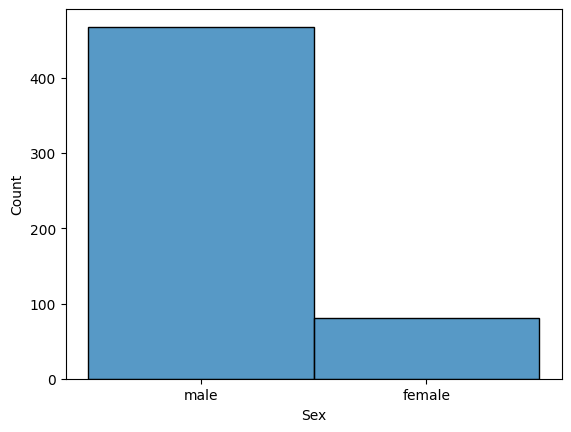

In [540]:


sns.histplot(data[data["Survived"] == 0]["Sex"])


<Axes: xlabel='Sex', ylabel='Count'>

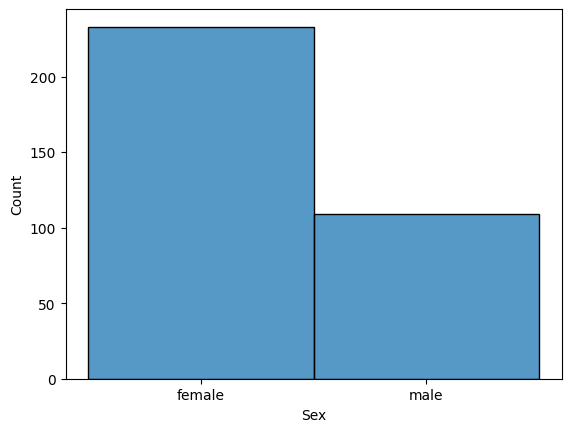

In [541]:
sns.histplot(data[data["Survived"] == 1]["Sex"])

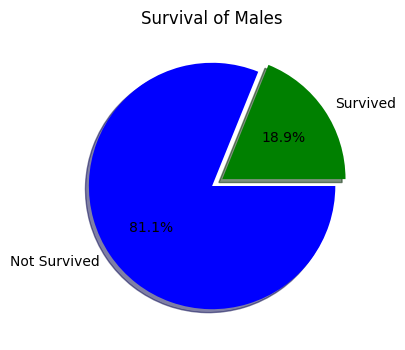

In [542]:
male_survived = data[(data["Sex"] == "male")]["Survived"]

# Calculate survival counts
survived_count = male_survived.sum()
not_survived_count = len(male_survived) - survived_count

# Data labels
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'blue']
explode = (0.1, 0)  

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Survival of Males')

plt.show()

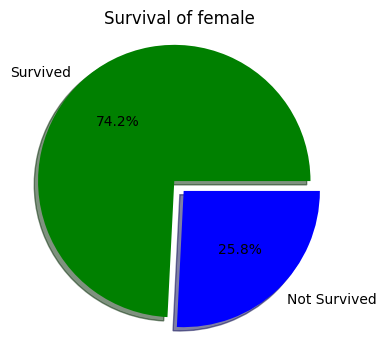

In [543]:
female_survived = data[(data["Sex"] == "female")]["Survived"]


survived_count = female_survived.sum()
not_survived_count = len(female_survived) - survived_count


labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'blue']
explode = (0.1, 0)  # explode the first slice

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Survival of female')
plt.axis('equal') 
plt.show()

Conclusion:- More men died in comparision to Women

(ii) PClass

<Axes: xlabel='Pclass', ylabel='Count'>

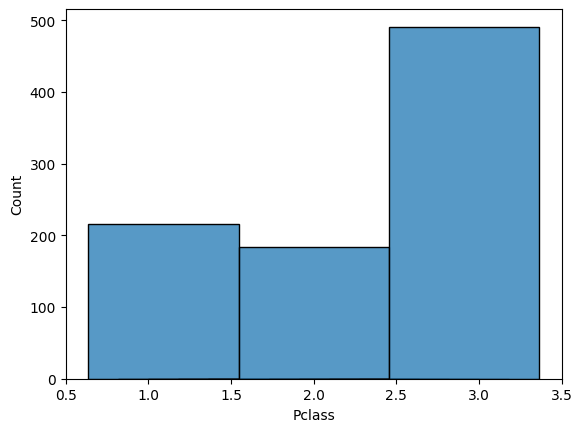

In [544]:


sns.histplot(data["Pclass"],shrink = 5)

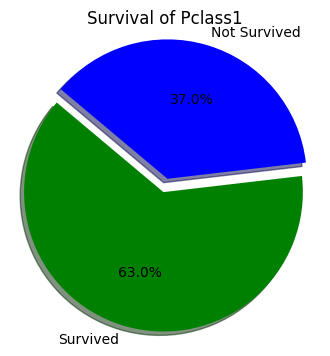

In [545]:
Pclass1_survived = data[(data["Pclass"] == 1)]["Survived"]

# Calculate survival counts
survived_count = Pclass1_survived.sum()
not_survived_count = len(Pclass1_survived) - survived_count

# Data labels
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'blue']
explode = (0.1, 0)  

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival of Pclass1')
plt.axis('equal') 
plt.show()

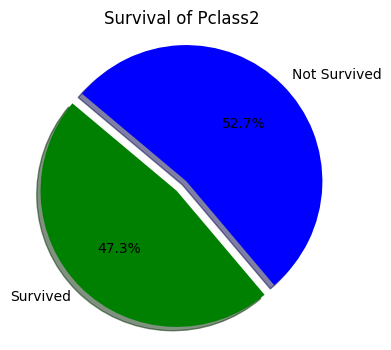

In [546]:
Pclass2_survived = data[(data["Pclass"] == 2)]["Survived"]

# Calculate survival counts
survived_count = Pclass2_survived.sum()
not_survived_count = len(Pclass2_survived) - survived_count

# Data labels
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'blue']
explode = (0.1, 0)  

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival of Pclass2')
plt.axis('equal')  
plt.show()

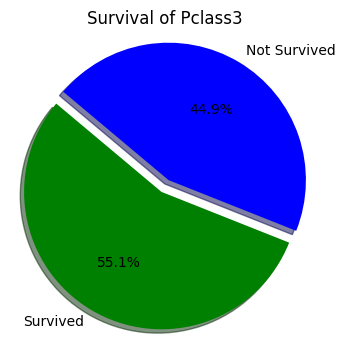

In [547]:
Pclass3_survived = data[(data["Pclass"] == 3)]["Survived"]

# Calculate survival counts
survived_count = Pclass3_survived.sum()
not_survived_count = len(Pclass1_survived) - survived_count

# Data labels
labels = ['Survived', 'Not Survived']
sizes = [survived_count, not_survived_count]
colors = ['green', 'blue']
explode = (0.1, 0)  

# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Survival of Pclass3')
plt.axis('equal')  
plt.show()

Chances of Survival of Pclass3 people is less than other classes

(iii) Target Column

In [548]:
data["Survived"].value_counts().index

Index([0, 1], dtype='int64', name='Survived')

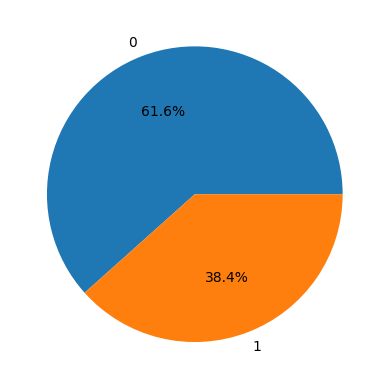

In [549]:
plt.pie(data["Survived"].value_counts(),autopct = "%1.1f%%",labels = data["Survived"].value_counts().index)
plt.show()

Survival are less as compare to Not-Survived

## Model Training

In [550]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [551]:
numeric_features = ["Age","Pclass","Fare","family_member"]

In [552]:
preprocessing = ColumnTransformer(
    transformers=[
        
        ("standardisation", StandardScaler(), numeric_features),
        ("ohe", OneHotEncoder(sparse_output=False, drop="first"), ["Sex", "Embarked"])
          
    ],
    remainder="passthrough"
)

In [553]:
Pipe = Pipeline([("preprocessing",preprocessing),
                ("classfication",LogisticRegression())])

In [554]:

X = data.drop(columns = ["Survived"])
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.8)

In [555]:
Age_mean = np.mean(X_train["Age"].dropna().values)

X_train["Age"] = X_train["Age"].fillna(Age_mean)
X_test["Age"] = X_test["Age"].fillna(Age_mean)

In [556]:

Embarked_mode = statistics.mode(X_train["Embarked"].dropna().values)

X_train["Embarked"] = X_train["Embarked"].fillna(Embarked_mode)
X_test["Embarked"] = X_test["Embarked"].fillna(Embarked_mode)

In [ ]:
X_train_transformed = preprocessing.fit_transform(X_train)

In [557]:
Pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardisation',
                                                  StandardScaler(),
                                                  ['Age', 'Pclass', 'Fare',
                                                   'family_member']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classfication', LogisticRegression())])

In [558]:
y_predict = Pipe.predict(X_test)

## Model Evaluation

In [559]:
from sklearn.metrics import accuracy_score

In [560]:
accuracy_score(y_test,y_predict)


0.8022440392706872

In [561]:
from sklearn.model_selection import cross_val_score 

In [562]:
np.mean(cross_val_score(LogisticRegression(),X_train_transformed,y_train,cv = 10,scoring = "accuracy"))

0.8045751633986928

## Hyperparameter Tunning

In [563]:
from sklearn.model_selection import GridSearchCV


In [567]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  
}


In [568]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')

In [569]:
grid_search.fit(X_train_transformed ,y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used wh

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [570]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'saga'}


In [571]:
best_score = grid_search.best_score_
print("Best Accuracy:", best_score)

Best Accuracy: 0.8099999999999999


Optimised Model

In [579]:
Model = Pipeline([("preprocessing",preprocessing),
                ("classfication",LogisticRegression(penalty = 'l1',solver = "saga"))])

In [580]:
Model.fit(X_train,y_train)

D:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardisation',
                                                  StandardScaler(),
                                                  ['Age', 'Pclass', 'Fare',
                                                   'family_member']),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classfication',
                 LogisticRegression(penalty='l1', solver='saga'))])

In [581]:
y_predict = Model.predict(X_test)


In [582]:
accuracy_score(y_test,y_predict)

0.8050490883590463

In [585]:
import pickle 

pickle.dump(Model,open("Model.pkl","wb"))